In [ ]:
import os

# Đường dẫn tới thư mục chứa các folder con
root_dir = r"E:\LET_ME_COOK\Captone\PixelNerf_finetuning\dataset_pottery_11nv_fixed\train"  # sửa lại nếu khác

# Duyệt qua tất cả folder con
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    # Chỉ xử lý nếu là folder
    if os.path.isdir(folder_path):
        # Đếm tất cả các file trong folder (bao gồm cả file trong thư mục con)
        total_files = sum(len(files) for _, _, files in os.walk(folder_path))
        print(f"{folder_name}: {total_files} files")


In [ ]:
import os
above_5 = []
below_5 = []

for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    if os.path.isdir(folder_path):
        total_files = sum(len(files) for _, _, files in os.walk(folder_path))
        if total_files < 12:
            above_5.append((folder_name, total_files))
        else:
            below_5.append((folder_name, total_files))

# In kết quả chi tiết
print("📁 Folder có nhiều hơn 100 tệp:")
for name, count in above_5:
    print(f"  {name}: {count} files")

print("\n📁 Folder có ít hơn hoặc bằng 100 tệp:")
for name, count in below_5:
    print(f"  {name}: {count} files")

# Tính tổng
print("\n📊 Tổng kết:")
print(f"  Số folder >5 files: {len(above_5)} (tổng {sum(c for _, c in above_5)} files)")
print(f"  Số folder ≤5 files: {len(below_5)} (tổng {sum(c for _, c in below_5)} files)")

In [2]:
import pandas as pd

path=r"E:\LET_ME_COOK\Captone\PixelNerf_finetuning\report\cumulative_frame_counts.csv"
df=pd.read_csv(path)
df.head()


,threshold,num_objects_ge_threshold,total_objects
0,2,230,230
1,3,207,230
2,4,205,230
3,5,204,230
4,6,204,230


In [6]:
# keep largest threshold for each num_objects_ge_threshold
latest = {}

for _, row in df.iterrows():
    num = row['num_objects_ge_threshold']
    latest[num] = row     # luôn ghi đè => giữ threshold lớn nhất

filtered = list(latest.values())

# sắp xếp lại theo threshold tăng dần (nếu muốn giống file gốc)
filtered = sorted(filtered, key=lambda r: r['threshold'])

fdf = pd.DataFrame(filtered)

out_path = r"E:\LET_ME_COOK\Captone\PixelNerf_finetuning\report\cumulative_frame_counts.csv"
fdf.to_csv(out_path, index=False)
out_path


'E:\\LET_ME_COOK\\Captone\\PixelNerf_finetuning\\report\\cumulative_frame_counts.csv'

In [ ]:
"""
================= TỔNG KẾT SPLIT =================
bat_gom    | train:  11 | val:   2 | test:   3 | total:  16
binh_gom   | train: 139 | val:  30 | test:  29 | total: 198
chen_gom   | train:   6 | val:   1 | test:   1 | total:   8
ly_dong    | train:   1 | val:   0 | test:   0 | total:   1
other      | train:   5 | val:   1 | test:   1 | total:   7
"""

In [8]:
import torch
print('cuda_avail =', torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

cuda_avail = True
NVIDIA GeForce RTX 3060


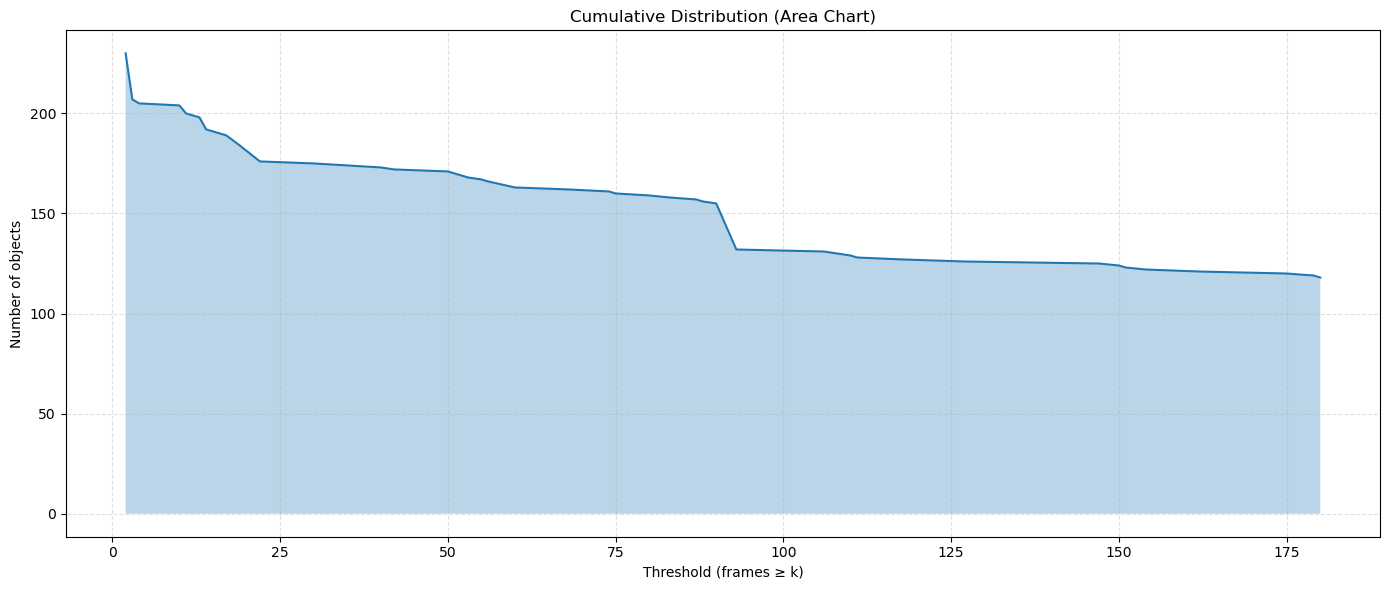

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load uploaded CSV
df = pd.read_csv(r"E:\LET_ME_COOK\Captone\PixelNerf_finetuning\report\cumulative_frame_counts.csv")

df.head()

plt.figure(figsize=(14,6))
plt.fill_between(df['threshold'], df['num_objects_ge_threshold'], alpha=0.3)
plt.plot(df['threshold'], df['num_objects_ge_threshold'])
plt.xlabel("Threshold (frames ≥ k)")
plt.ylabel("Number of objects")
plt.title("Cumulative Distribution (Area Chart)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

